In [8]:
import pandas as pd
import numpy as np
sd = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\Class\Machine Learning\Sales.csv')

In [9]:
sd.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [10]:
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Customer_Gender   113036 non-null  object
 7   Country           113036 non-null  object
 8   State             113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Sub_Category      113036 non-null  object
 11  Product           113036 non-null  object
 12  Order_Quantity    113036 non-null  int64 
 13  Unit_Cost         113036 non-null  int64 
 14  Unit_Price        113036 non-null  int64 
 15  Profit            113036 non-null  int64 
 16  Cost              113036 non-null  int

# Checking Object Category


In [11]:
sd.select_dtypes(exclude=['float','int']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Month             113036 non-null  object
 2   Age_Group         113036 non-null  object
 3   Customer_Gender   113036 non-null  object
 4   Country           113036 non-null  object
 5   State             113036 non-null  object
 6   Product_Category  113036 non-null  object
 7   Sub_Category      113036 non-null  object
 8   Product           113036 non-null  object
dtypes: object(9)
memory usage: 7.8+ MB


In [12]:
data_obj = sd.select_dtypes(['object'])

sd[data_obj.columns] = data_obj.apply(lambda x: x.str.strip())

# checking date column

In [6]:
pd.set_option('display.max_rows', 500)
sd['Date'].value_counts()

2016-03-01    288
2014-03-01    288
2013-12-07    241
2015-12-07    241
2016-06-14    236
             ... 
2011-02-21      1
2012-02-21      1
2012-05-29      1
2011-05-29      1
2012-11-04      1
Name: Date, Length: 1884, dtype: int64

In [37]:
sd.loc[sd['Date'] == " "].shape

(0, 18)

In [40]:
sd.loc[sd['Date'] == " ","Date"] = np.nan

In [41]:
sd['Date'].isnull().sum()

0

In [30]:
df=sd.loc[pd.to_numeric(sd['Date'],errors='coerce').notna()==False].copy()
df.shape
df['Date'].value_counts()

Series([], Name: Date, dtype: int64)

As you can see the 'Date' column is in object data type. So we need to convert it to datetime type.

In [9]:
sd['Date'] = pd.to_datetime(sd['Date'])

# Checking Month Column

In [18]:
sd['Month'].value_counts() # all clear, no issue found

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

In [16]:
sd['Month'] = sd['Month'].astype(str)

In [21]:
sd['Month'].isnull().sum()

0

# Checking Age_Group Column

In [19]:
sd['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

In [20]:
sd['Age_Group'].isnull().sum()

0

# Checking Customer_Gender Column

In [22]:
sd['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

In [23]:
sd['Customer_Gender'].isnull().sum()

0

# Checking Country Column

In [24]:
sd['Country'].value_counts()

United States     39206
Australia         23936
Canada            14178
United Kingdom    13620
Germany           11098
France            10998
Name: Country, dtype: int64

In [27]:
sd['Country'].isnull().sum()

0

# Checking State Column

In [28]:
sd['State'].value_counts()

California             22450
British Columbia       14116
England                13620
Washington             11264
New South Wales        10412
Victoria                6016
Oregon                  5286
Queensland              5220
Saarland                2770
Nordrhein-Westfalen     2484
Hessen                  2384
Seine (Paris)           2328
Hamburg                 1836
Seine Saint Denis       1684
Nord                    1670
South Australia         1564
Bayern                  1426
Hauts de Seine          1084
Essonne                  994
Yveline                  954
Tasmania                 724
Seine et Marne           394
Moselle                  386
Loiret                   382
Val d'Oise               264
Garonne (Haute)          208
Brandenburg              198
Val de Marne             158
Charente-Maritime        148
Somme                    134
Loir et Cher             120
Pas de Calais             90
Alberta                   56
Texas                     30
Ohio          

# Checking Product_Category Column

In [31]:
sd['Product_Category'].value_counts()

Accessories    70120
Bikes          25982
Clothing       16934
Name: Product_Category, dtype: int64

In [32]:
sd["Product_Category"].isnull().sum()

0

# Checking Sub_Category Column

In [33]:
sd['Sub_Category'].value_counts()

Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

In [34]:
sd['Sub_Category'].isnull().sum()

0

# Checking Product Column

In [35]:
sd['Product'].value_counts()

Water Bottle - 30 oz.              10794
Patch Kit/8 Patches                10416
Mountain Tire Tube                  6816
AWC Logo Cap                        4358
Sport-100 Helmet, Red               4220
Road Tire Tube                      4176
Sport-100 Helmet, Black             4152
Fender Set - Mountain               4032
Sport-100 Helmet, Blue              3788
Touring Tire Tube                   3702
Road Bottle Cage                    2640
Mountain Bottle Cage                2444
Bike Wash - Dissolver               1804
HL Mountain Tire                    1800
LL Road Tire                        1686
ML Road Tire                        1396
ML Mountain Tire                    1376
Hydration Pack - 70 oz.             1332
Mountain-200 Black, 38              1208
Mountain-200 Silver, 38             1106
Mountain-200 Silver, 42             1054
HL Road Tire                        1006
Half-Finger Gloves, S                994
Mountain-200 Black, 46               992
Mountain-200 Bla

In [36]:
sd['Product'].isnull().sum()

0

In [21]:
x = sd.isnull().sum()

In [22]:
y = pd.DataFrame(x)[0]

In [23]:
miss_cols = pd.DataFrame(y[y>0]).index.tolist()

In [24]:
sd[miss_cols].isnull().sum()

Series([], dtype: float64)

In [48]:
pip install missingno

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [25]:
import missingno as msno

In [28]:
miss_data = sd

<Axes: >

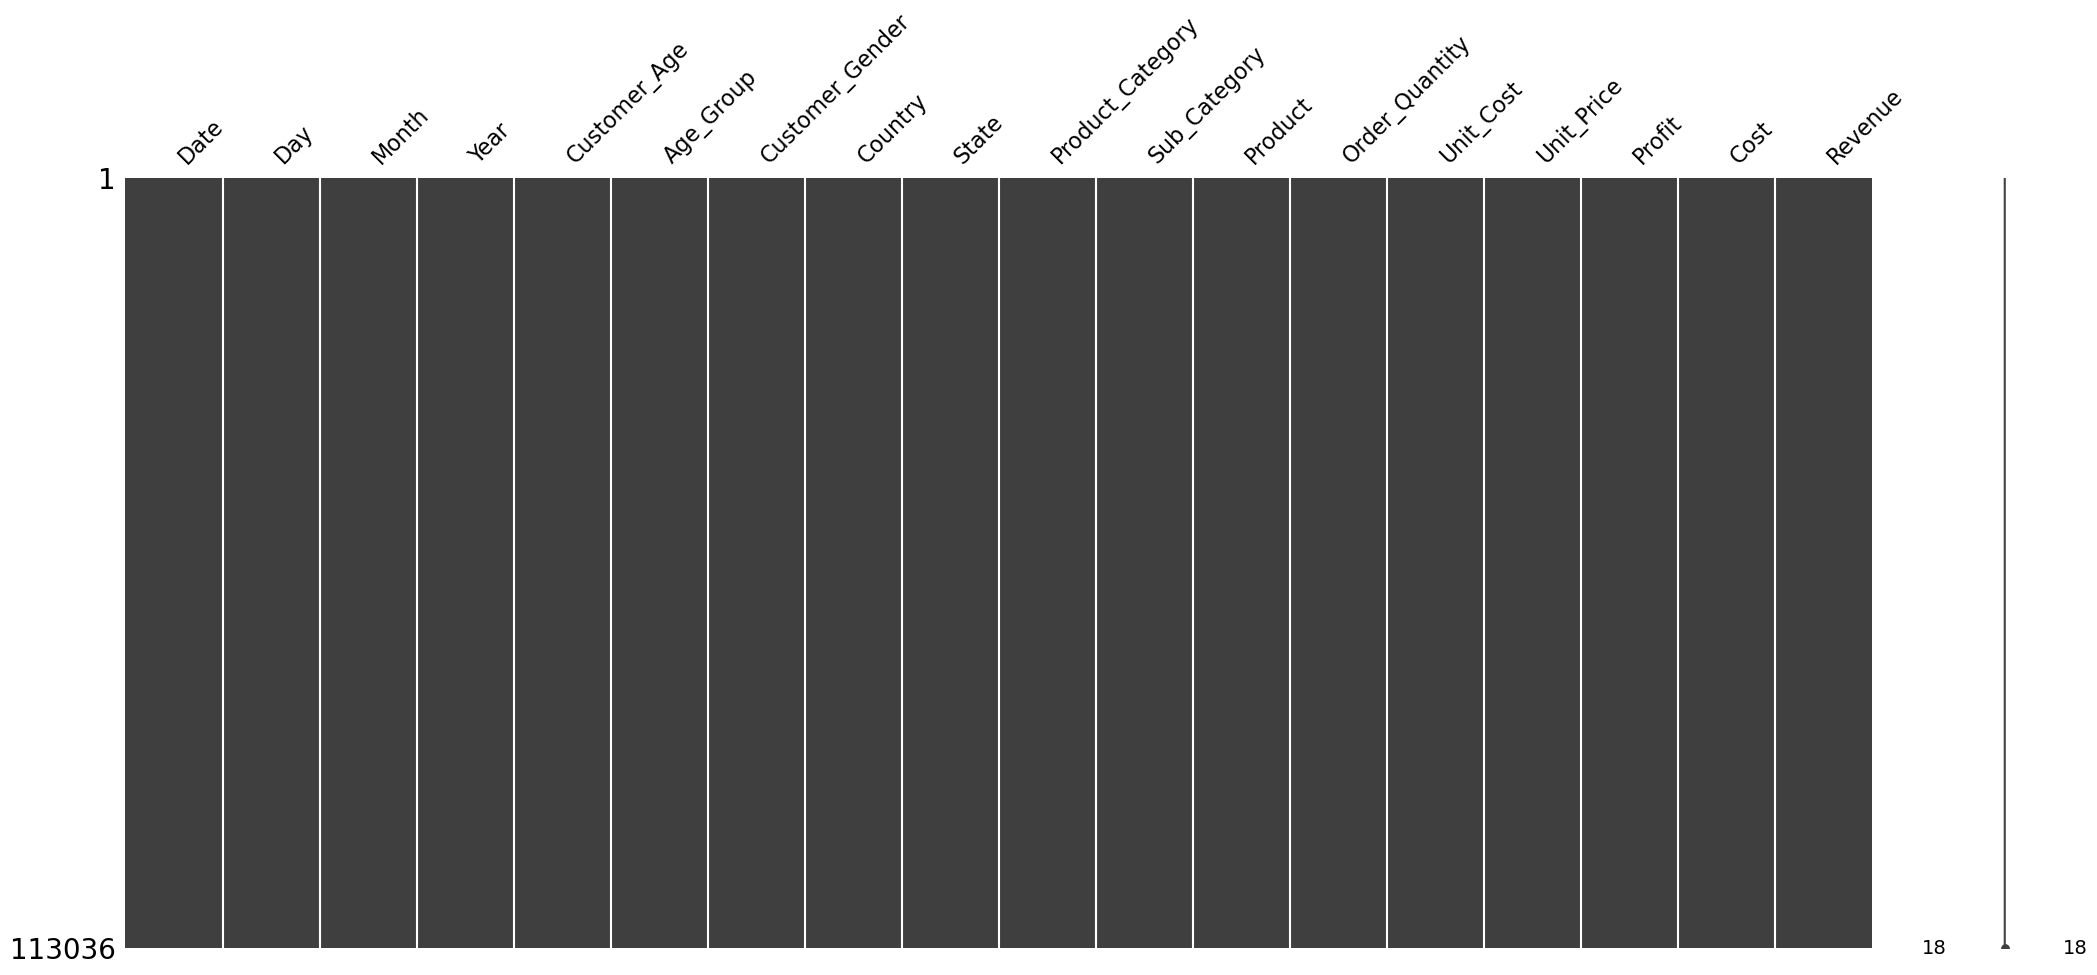

In [29]:
msno.matrix(miss_data)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

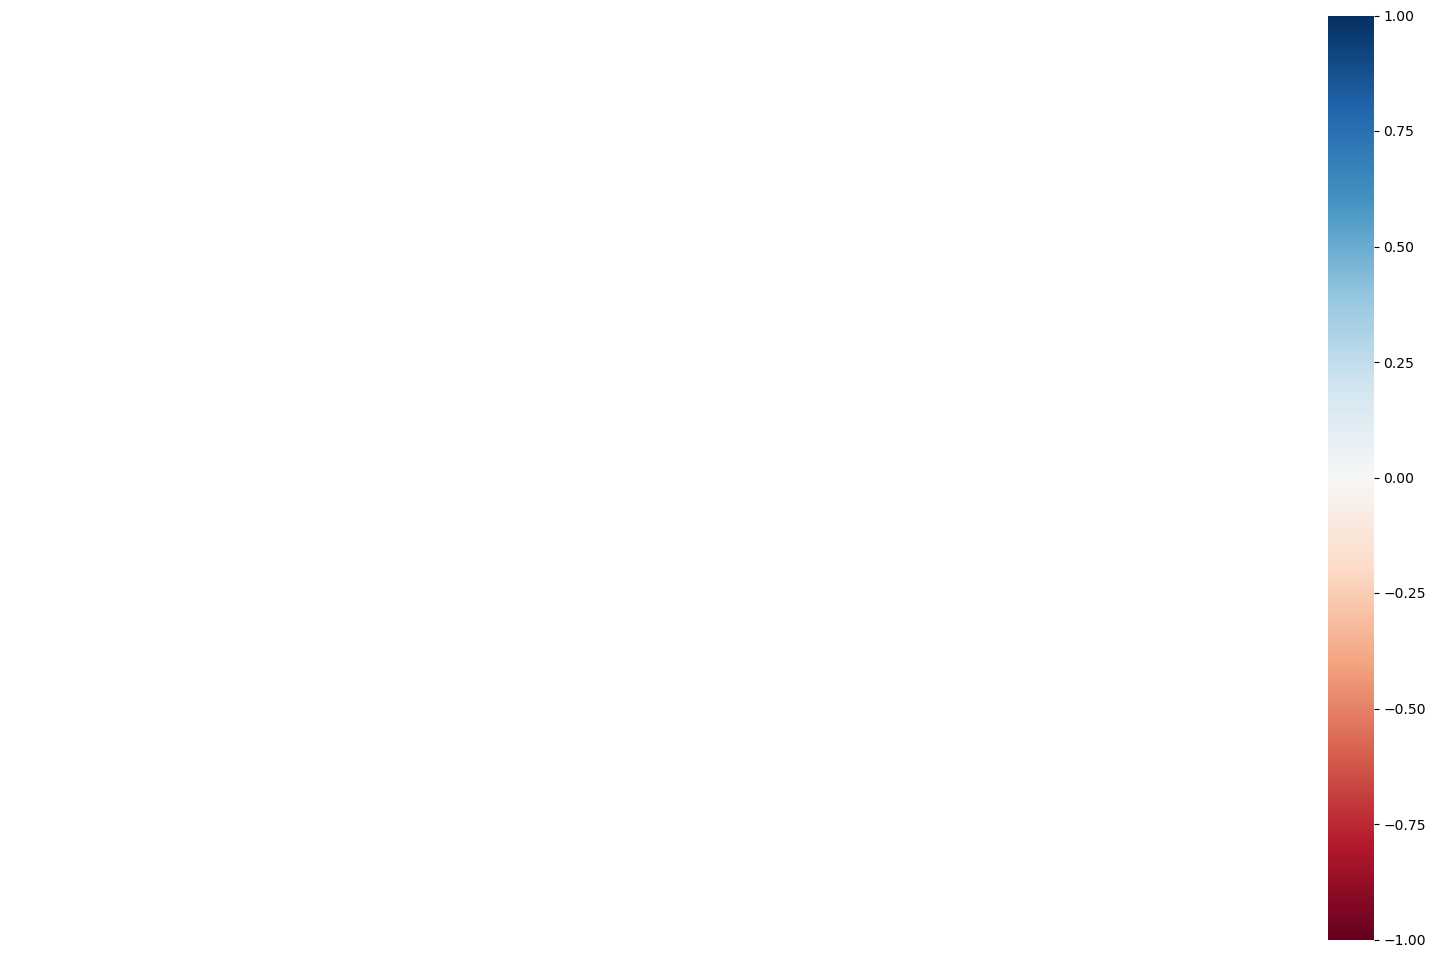

In [31]:
msno.heatmap(sd)

<Axes: >

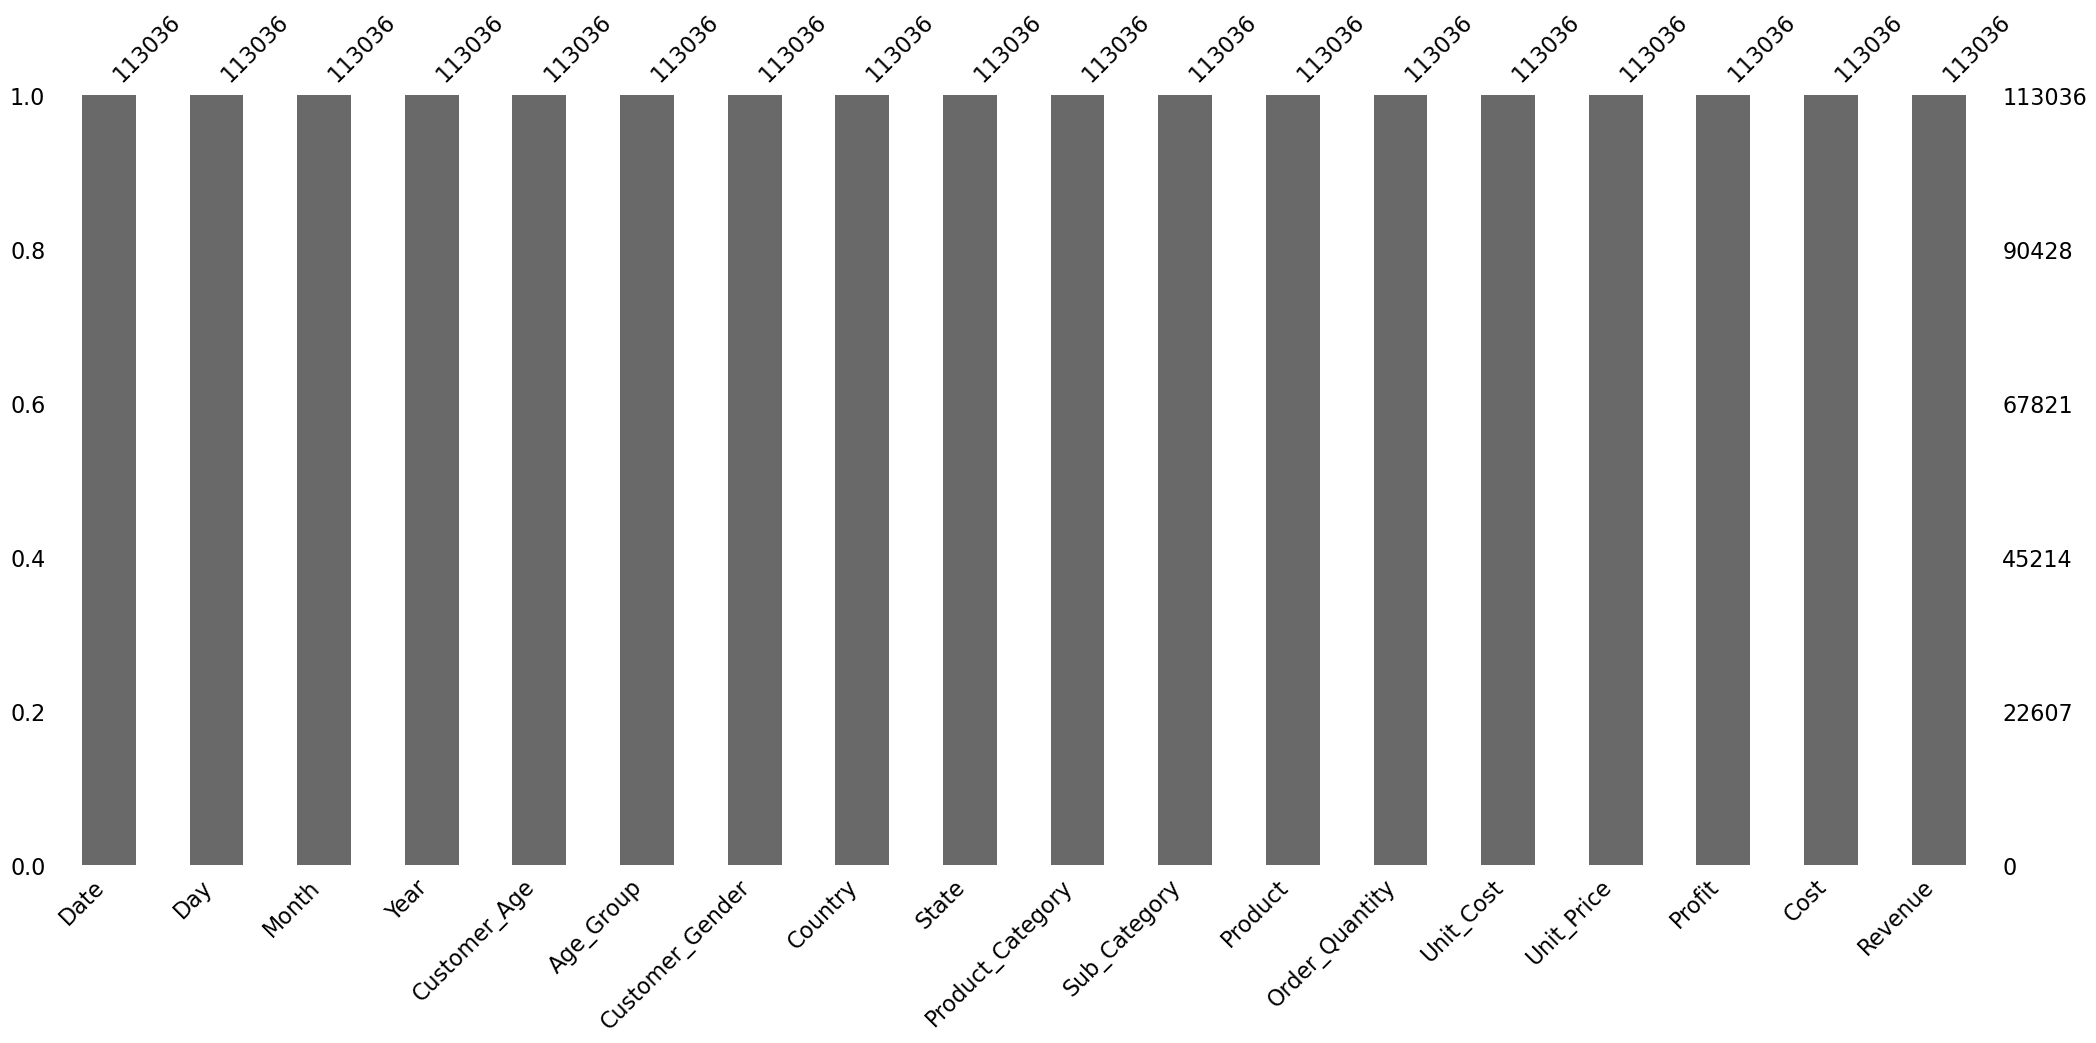

In [32]:
msno.bar(sd)

In [35]:
sd.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [36]:
sd.shape

(113036, 18)

In [41]:
sd. duplicated().sum() # we have 1000 duplicate rows

1000

In [42]:
sd1 = sd.drop_duplicates()  # we deleted duplicates here

In [43]:
sd1

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2016-04-12,12,April,2016,41,Adults (35-64),M,United Kingdom,England,Clothing,Vests,"Classic Vest, S",3,24,64,112,72,184
113032,2014-04-02,2,April,2014,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113033,2016-04-02,2,April,2016,18,Youth (<25),M,Australia,Queensland,Clothing,Vests,"Classic Vest, M",22,24,64,655,528,1183
113034,2014-03-04,4,March,2014,37,Adults (35-64),F,France,Seine (Paris),Clothing,Vests,"Classic Vest, L",24,24,64,684,576,1260


# Performing EDA

In [37]:
sd.columns

Index(['Date', 'Day', 'Month', 'Year', 'Customer_Age', 'Age_Group',
       'Customer_Gender', 'Country', 'State', 'Product_Category',
       'Sub_Category', 'Product', 'Order_Quantity', 'Unit_Cost', 'Unit_Price',
       'Profit', 'Cost', 'Revenue'],
      dtype='object')

In [38]:
sd.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [40]:
sd.duplicated().sum()

1000

# Getting demanding products from order quantity

In [44]:
grouped = sd.groupby('Product')

In [45]:
demand_data = grouped['Order_Quantity'].sum().reset_index()

In [46]:
demand_data = demand_data.sort_values(by = 'Order_Quantity', ascending = False)

In [47]:
demand_data

,Product,Order_Quantity
126,Water Bottle - 30 oz.,164086
52,Patch Kit/8 Patches,157583
23,Mountain Tire Tube,102792
0,AWC Logo Cap,67316
101,"Sport-100 Helmet, Red",63663
...,...,...
25,"Mountain-100 Black, 42",73
117,"Touring-3000 Blue, 50",70
50,"Mountain-500 Silver, 48",52
87,"Road-650 Red, 52",52


# What product has high demand in which country

In [50]:
grouped = sd.groupby(['Country','Product'])

In [51]:
demand_data = grouped['Order_Quantity'].sum().reset_index()

In [52]:
demand_data = demand_data.sort_values(by = 'Order_Quantity', ascending = False)

In [65]:
demand_data.head(10)

,Country,Product,Order_Quantity
741,United States,Water Bottle - 30 oz.,61174
667,United States,Patch Kit/8 Patches,56408
639,United States,Mountain Tire Tube,44137
126,Australia,Water Bottle - 30 oz.,32764
52,Australia,Patch Kit/8 Patches,32668
622,United States,Fender Set - Mountain,28031
153,Canada,Mountain Tire Tube,27546
174,Canada,Patch Kit/8 Patches,25926
714,United States,"Sport-100 Helmet, Black",23571
237,Canada,Water Bottle - 30 oz.,22940


# What product has high demand in which states

In [67]:
grouped = sd.groupby(['State','Product'])

In [68]:
grouped = grouped['Order_Quantity'].sum().reset_index()

In [69]:
demand_data = grouped.sort_values(by = 'Order_Quantity', ascending = False)

In [70]:
demand_data.head(10)

,State,Product,Order_Quantity
385,California,Water Bottle - 30 oz.,36635
317,California,Patch Kit/8 Patches,27855
181,British Columbia,Mountain Tire Tube,27505
202,British Columbia,Patch Kit/8 Patches,25799
265,British Columbia,Water Bottle - 30 oz.,22940
292,California,Mountain Tire Tube,22747
537,England,Water Bottle - 30 oz.,19751
2553,Washington,Patch Kit/8 Patches,19318
1237,New South Wales,Water Bottle - 30 oz.,17879
2534,Washington,Mountain Tire Tube,16759


# What age group buying which product in maximum.

In [96]:
grouped_ByAge = sd.groupby(['Customer_Age','Product'])

In [98]:
demand_data_ByAge = grouped_ByAge['Order_Quantity'].sum().reset_index()

In [99]:
demand_data_ByAge = demand_data_ByAge.sort_values(by = 'Order_Quantity', ascending = False)

In [88]:
demand_data_ByAge.head(15).reset_index()

,index,Customer_Age,Product,Order_Quantity
0,1323,31,Water Bottle - 30 oz.,8149
1,1639,35,Mountain Tire Tube,8085
2,1122,29,Water Bottle - 30 oz.,7759
3,1019,28,Water Bottle - 30 oz.,7475
4,1263,31,Patch Kit/8 Patches,7113
5,1614,34,Water Bottle - 30 oz.,6999
6,590,24,Patch Kit/8 Patches,6711
7,1561,34,Patch Kit/8 Patches,6525
8,1220,30,Water Bottle - 30 oz.,6354
9,339,21,Patch Kit/8 Patches,6337


# Calculating unique products

In [106]:
sd['Product'].nunique()

130

# Calculating unique categories

In [109]:
sd['Product_Category'].nunique()

3

# Calculating unique Sub Category

In [111]:
sd['Sub_Category'].nunique()

17

# Calculating mean of customer age

In [113]:
sd['Customer_Age'].mean()

35.91921157861212

# Calculating mean of order quantity

In [115]:
sd['Order_Quantity'].mean()

11.901659648253654

# Calculating mean of profit

In [117]:
sd['Profit'].mean()

285.0516649562971

# Calculating mean of unit cost

In [121]:
sd['Unit_Cost'].mean()

267.296365759581

# Calculating average order quantity by customer age

In [135]:
ave_order_quantity = sd.groupby('Customer_Age')['Order_Quantity'].mean().reset_index()

In [136]:
ave_order_quantity = ave_order_quantity.sort_values(by = 'Order_Quantity', ascending = False).reset_index()

In [137]:
ave_order_quantity

,index,Customer_Age,Order_Quantity
0,68,86,23.500000
1,64,81,19.583333
2,57,74,18.937500
3,56,73,18.666667
4,61,78,18.590909
...,...,...,...
65,60,77,10.437500
66,51,68,10.156250
67,49,66,9.529412
68,67,85,9.125000


# identify high value customer age based on their lifetime value (total value generated) as we dont have customer unique id

In [139]:
total_revenue = sd.groupby('Customer_Age')['Revenue'].sum().reset_index()

In [140]:
total_revenue = total_revenue.sort_values(by = 'Revenue', ascending = False)

In [141]:
total_revenue.head(10)

,Customer_Age,Revenue
11,28,4084886
12,29,3721430
17,34,3485459
14,31,3376632
18,35,3240027
15,32,2897884
22,39,2857516
21,38,2848191
10,27,2827026
23,40,2792078


In [142]:
import matplotlib.pyplot as plt

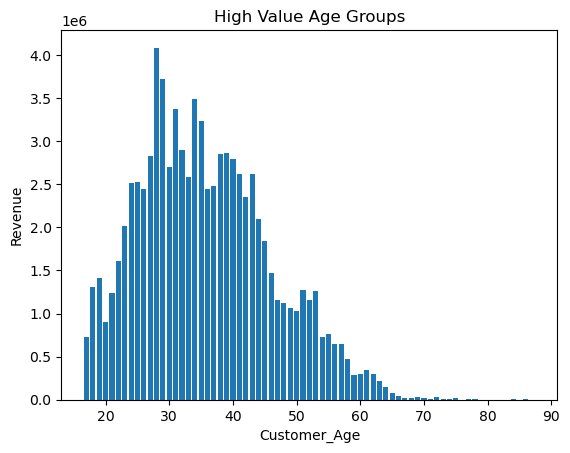

In [143]:
plt.bar(total_revenue['Customer_Age'], total_revenue['Revenue'])
plt.xlabel('Customer_Age')
plt.ylabel('Revenue')
plt.title('High Value Age Groups')
plt.show()

# Finding correlation between customer age and purchase behviour

In [145]:
sd[['Customer_Age', 'Order_Quantity']].describe()

,Customer_Age,Order_Quantity
count,113036.000000,113036.000000
mean,35.919212,11.901660
std,11.021936,9.561857
min,17.000000,1.000000
25%,28.000000,2.000000
50%,35.000000,10.000000
75%,43.000000,20.000000
max,87.000000,32.000000


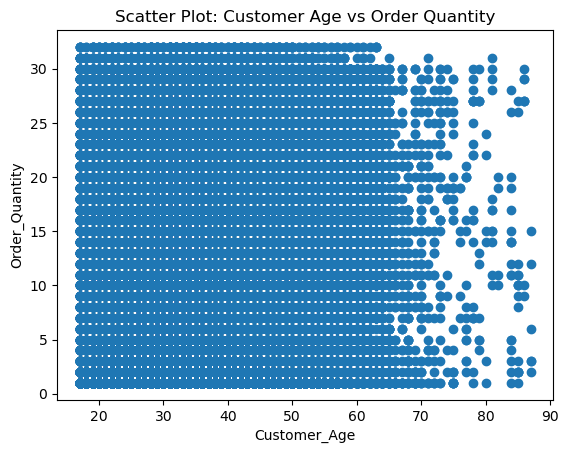

In [146]:
plt.scatter(sd['Customer_Age'], sd['Order_Quantity'])
plt.xlabel('Customer_Age')
plt.ylabel('Order_Quantity')
plt.title('Scatter Plot: Customer Age vs Order Quantity')
plt.show()

In [147]:
correlation_coefficient = sd['Customer_Age'].corr(sd['Order_Quantity'])

In [148]:
correlation_coefficient

0.02688667249452248

C:\Users\hp\AppData\Local\Temp\ipykernel_11392\1780661904.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = sd.corr()


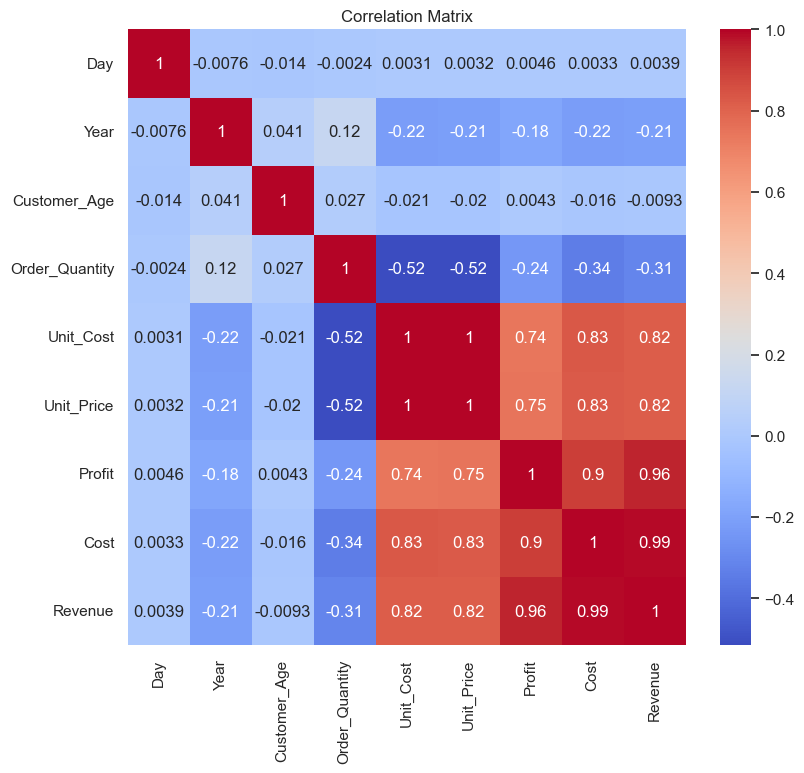

In [152]:
import seaborn as sns
correlation_matrix = sd.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
sns.set (rc = {'figure.figsize':(13, 13)})
plt.title('Correlation Matrix')
plt.show()

# Sales pattern by State, City

In [178]:
state_sales = sd.groupby(['State','Country'])['Revenue'].sum().reset_index()
state_sales = state_sales.sort_values(by = 'Revenue', ascending = False).head(10)
state_sales.head(10)

,State,Country,Revenue
6,California,United States,17672620
8,England,United Kingdom,10646196
26,New South Wales,Australia,9203495
5,British Columbia,Canada,7877890
50,Washington,United States,6741510
35,Queensland,Australia,5066267
48,Victoria,Australia,5054839
33,Oregon,United States,3450410
15,Hessen,Germany,2073391
36,Saarland,Germany,2029545


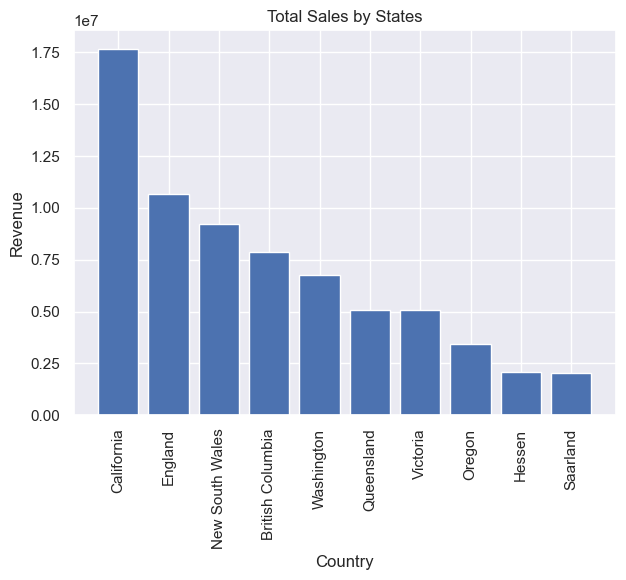

In [179]:
plt.figure(figsize = (7,5))
plt.bar(state_sales['State'], state_sales['Revenue'])
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Total Sales by States')
plt.xticks(rotation = 90)
plt.show()

In [172]:
state_sales1 = sd.groupby(['Country'])['Revenue'].sum().reset_index()
state_sales1 = state_sales1.sort_values(by = 'Revenue', ascending = False)
state_sales1.head(10)

,Country,Revenue
5,United States,27975547
0,Australia,21302059
4,United Kingdom,10646196
3,Germany,8978596
2,France,8432872
1,Canada,7935738


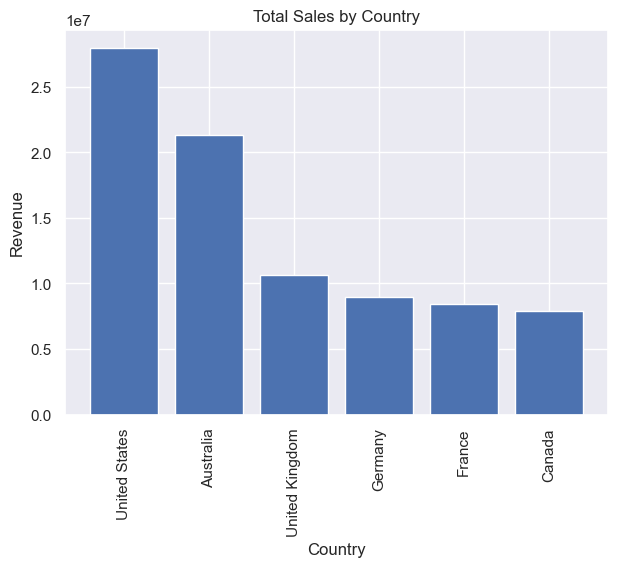

In [173]:
plt.figure(figsize = (7,5))
plt.bar(state_sales1['Country'], state_sales['Revenue'])
plt.xlabel('Country')
plt.ylabel('Revenue')
plt.title('Total Sales by Country')
plt.xticks(rotation = 90)
plt.show()